In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
# To visualize the training process
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("aug_train.csv")
data = data.dropna()

In [3]:
data.loc[data['experience'] == '<1', 'experience'] = 0
data.loc[data['experience'] == '>20', 'experience'] = 21
data.loc[data['last_new_job'] == 'never', 'last_new_job'] = 0
data.loc[data['last_new_job'] == '>4', 'last_new_job'] = 5

In [4]:
data['experience'] = pd.to_numeric(data['experience'])
data['last_new_job'] = pd.to_numeric(data['last_new_job'])

In [5]:
def normalizer(data, cols):
    mean = data[cols].mean()
    data[cols] -= mean
    var = data[cols].var()
    data[cols] /= var
    return data, mean, var


In [6]:
columns = np.array(['training_hours', 'experience', 'last_new_job'])
stats = np.empty((3, 2))
for i in range(0, 3):
    data, stats[i, 0], stats[i, 1] = normalizer(data, columns[i])

In [7]:
# Numericals are added.
final = (data[['city_development_index', 'training_hours', 'experience', 'last_new_job']]).values


In [8]:
categoricals = np.array(['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type'])


In [9]:
for i in categoricals:
    values = np.array(data[i])
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    onehot_encoder = OneHotEncoder(sparse=False)
    # Makes a column
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    final = np.hstack((final, onehot_encoder.fit_transform(integer_encoded)))

In [10]:
target = data.iloc[:,13:14].values
target = onehot_encoder.fit_transform(target)
values = final[:,:151]


In [11]:
final_train, final_test, target_train, target_test = train_test_split(values, target,test_size = 0.2)

In [12]:
model = Sequential()
model.add(Dense(12, input_dim=151, activation= 'relu'))
model.add(Dense(2, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(final_train, target_train, validation_data = (final_test, target_test), epochs=100, batch_size=64)

Epoch 1/100
112/112 [==============================] - 1s 6ms/step - loss: 0.4458 - accuracy: 0.8349 - val_loss: 0.4123 - val_accuracy: 0.8314
Epoch 2/100
112/112 [==============================] - 0s 3ms/step - loss: 0.3861 - accuracy: 0.8354 - val_loss: 0.3821 - val_accuracy: 0.8319
Epoch 3/100
112/112 [==============================] - 0s 4ms/step - loss: 0.3644 - accuracy: 0.8474 - val_loss: 0.3681 - val_accuracy: 0.8515
Epoch 4/100
112/112 [==============================] - 0s 3ms/step - loss: 0.3551 - accuracy: 0.8555 - val_loss: 0.3643 - val_accuracy: 0.8582
Epoch 5/100
112/112 [==============================] - 0s 3ms/step - loss: 0.3508 - accuracy: 0.8572 - val_loss: 0.3636 - val_accuracy: 0.8593
Epoch 6/100
112/112 [==============================] - 0s 3ms/step - loss: 0.3479 - accuracy: 0.8586 - val_loss: 0.3649 - val_accuracy: 0.8582
Epoch 7/100
112/112 [==============================] - 0s 3ms/step - loss: 0.3468 - accuracy: 0.8582 - val_loss: 0.3656 - val_accuracy: 0.8559

112/112 [==============================] - 0s 4ms/step - loss: 0.3223 - accuracy: 0.8717 - val_loss: 0.3945 - val_accuracy: 0.8599
Epoch 58/100
112/112 [==============================] - 0s 3ms/step - loss: 0.3217 - accuracy: 0.8719 - val_loss: 0.3946 - val_accuracy: 0.8565
Epoch 59/100
112/112 [==============================] - 0s 3ms/step - loss: 0.3218 - accuracy: 0.8702 - val_loss: 0.3957 - val_accuracy: 0.8543
Epoch 60/100
112/112 [==============================] - 0s 4ms/step - loss: 0.3211 - accuracy: 0.8709 - val_loss: 0.3984 - val_accuracy: 0.8526
Epoch 61/100
112/112 [==============================] - 1s 6ms/step - loss: 0.3200 - accuracy: 0.8714 - val_loss: 0.3966 - val_accuracy: 0.8537
Epoch 62/100
112/112 [==============================] - 0s 4ms/step - loss: 0.3205 - accuracy: 0.8710 - val_loss: 0.3984 - val_accuracy: 0.8548
Epoch 63/100
112/112 [==============================] - 0s 3ms/step - loss: 0.3201 - accuracy: 0.8716 - val_loss: 0.3976 - val_accuracy: 0.8520
Epoch

In [15]:
y_pred = model.predict(final_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(target_test)):
    test.append(np.argmax(target_test[i]))

In [16]:
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)


Accuracy is: 85.09212730318258


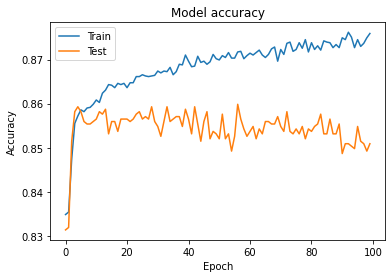

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

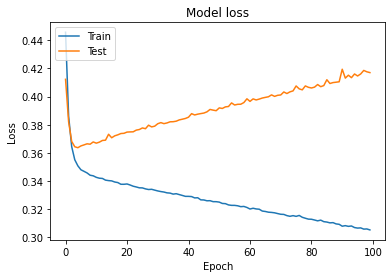

In [18]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()